**Project: Investigate a Dataset : TMDb movie data**


<p>*Table of Contents*




1- Introduction <br>
2- Cleaning<br>
3- Exploratory Data Analysis<br>
4- Conclusions<br>



1- *Introduction*

For this project I will investigate the factors that provide the highest profit percentage for movies in the last 3 decades. For this I will be using the TMDb data base whcih contains more than 5000 entries. We will try to see:

1.Which genres is most profitable in movie making ?

2. How did this change thorugh the years. 

3.Visualisation of outcomes revenue with time








**Knowing the data / Data cleaning**

In [65]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import warnings
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('movies.csv', header= 0,
                        encoding= 'unicode_escape')
df.head ()


Saving movies.csv to movies (2).csv


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.00,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.00,Stand by Me,R,1986-08-22,89,8.10,Wil Wheaton,299174,Stephen King,1986
1,6000000.00,Paramount Pictures,USA,John Hughes,Comedy,70136369.00,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.80,Matthew Broderick,264740,John Hughes,1986
2,15000000.00,Paramount Pictures,USA,Tony Scott,Action,179800601.00,Top Gun,PG,1986-05-16,110,6.90,Tom Cruise,236909,Jim Cash,1986
3,18500000.00,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.00,Aliens,R,1986-07-18,137,8.40,Sigourney Weaver,540152,James Cameron,1986
4,9000000.00,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.00,Flight of the Navigator,PG,1986-08-01,90,6.90,Joey Cramer,36636,Mark H. Baker,1986


In [66]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


The data consists mostly objects

In [67]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6820.00,6820.00,6820.00,6820.00,6820.00,6820.00
mean,24581129.07,33497828.62,106.55,6.37,71219.52,2001.00
std,37022536.39,58197602.01,18.03,1.00,130517.63,8.94
min,0.00,70.00,50.00,1.50,27.00,1986.00
25%,0.00,1515839.00,95.00,5.80,7665.25,1993.00
50%,11000000.00,12135679.00,102.00,6.40,25892.50,2001.00
75%,32000000.00,40065340.50,115.00,7.10,75812.25,2009.00
max,300000000.00,936662225.00,366.00,9.30,1861666.00,2016.00


In [0]:
movies = df.copy()

Although the info shows that no NaN items. However a biref check of the values in budget sections shows a number of zeroes. Considering that these movies are finished products we can confer that a zero budget is not possible. Firstly we will replace them with the mean. 

In [69]:
movies["budget"].replace(0.0, np.nan,inplace=True)
movies

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.00,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.00,Stand by Me,R,1986-08-22,89,8.10,Wil Wheaton,299174,Stephen King,1986
1,6000000.00,Paramount Pictures,USA,John Hughes,Comedy,70136369.00,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.80,Matthew Broderick,264740,John Hughes,1986
2,15000000.00,Paramount Pictures,USA,Tony Scott,Action,179800601.00,Top Gun,PG,1986-05-16,110,6.90,Tom Cruise,236909,Jim Cash,1986
3,18500000.00,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.00,Aliens,R,1986-07-18,137,8.40,Sigourney Weaver,540152,James Cameron,1986
4,9000000.00,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.00,Flight of the Navigator,PG,1986-08-01,90,6.90,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,nan,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.00,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.40,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,nan,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.00,Mothers and Daughters,PG-13,2016-05-06,90,4.90,Selma Blair,1959,Paige Cameron,2016
6817,3500000.00,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.00,Batman: The Killing Joke,R,2016-07-25,76,6.50,Kevin Conroy,36333,Brian Azzarello,2016
6818,nan,Borderline Presents,USA,Nicolas Pesce,Drama,25981.00,The Eyes of My Mother,R,2016-12-02,76,6.20,Kika Magalhães,6947,Nicolas Pesce,2016


To decide if we want to drop or replace I will check the percentage of nulls in the budget column

In [70]:
movies['budget'].isnull().sum()*100/movies['budget'].shape[0]

31.994134897360702

as almost 31 percent of it seems to be null I will replace not to lose one third of the data. 

In [71]:
movies['budget'].mean()


36145601.601768

In [72]:
movies["budget"].fillna(movies["budget"].mean(), inplace=True)
movies.tail ()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6815,36145601.60,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.00,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.40,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,36145601.60,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.00,Mothers and Daughters,PG-13,2016-05-06,90,4.90,Selma Blair,1959,Paige Cameron,2016
6817,3500000.00,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.00,Batman: The Killing Joke,R,2016-07-25,76,6.50,Kevin Conroy,36333,Brian Azzarello,2016
6818,36145601.60,Borderline Presents,USA,Nicolas Pesce,Drama,25981.00,The Eyes of My Mother,R,2016-12-02,76,6.20,Kika Magalhães,6947,Nicolas Pesce,2016
6819,36145601.60,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.00,From the Land of the Moon,R,2017-07-28,120,6.70,Marion Cotillard,2411,Milena Agus,2016


Lets check for outliers. I'll start with a box graph

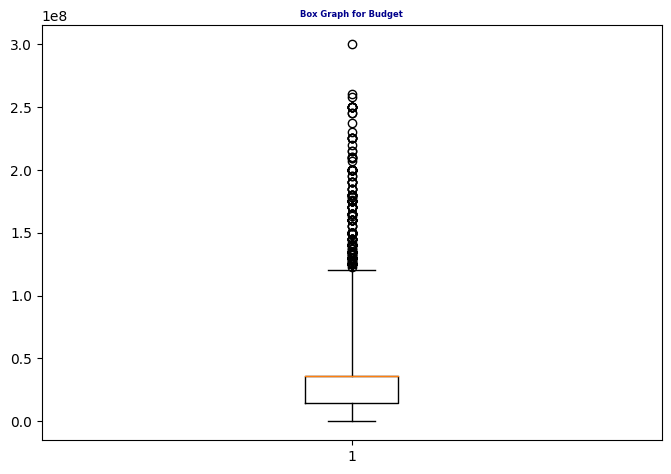

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 12 }
title_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 6 }

plt.boxplot(movies["budget"], whis=4)
plt.title("Box Graph for Budget", fontdict=title_font)
plt.show()

In [74]:
from scipy.stats import zscore

z_scores = zscore(movies["budget"])
for threshold in range(1,7):
    print("Threshold: {}".format(threshold))
    print("Number of outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold: 1
Number of outliers: 690
------
Threshold: 2
Number of outliers: 311
------
Threshold: 3
Number of outliers: 185
------
Threshold: 4
Number of outliers: 90
------
Threshold: 5
Number of outliers: 28
------
Threshold: 6
Number of outliers: 14
------


We need to decide if we want to keep the outlier values.The very high values will be useful and the max from the budget is a budget that actually is acceptable.

As mentioned we will see the monetary gains of movies. For this we will add two more columns, one for profit and the other for profit percentage. 

In [75]:
movies ['profit']  = movies ['gross'] - movies ['budget']
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit
0,8000000.00,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.00,Stand by Me,R,1986-08-22,89,8.10,Wil Wheaton,299174,Stephen King,1986,44287414.00
1,6000000.00,Paramount Pictures,USA,John Hughes,Comedy,70136369.00,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.80,Matthew Broderick,264740,John Hughes,1986,64136369.00
2,15000000.00,Paramount Pictures,USA,Tony Scott,Action,179800601.00,Top Gun,PG,1986-05-16,110,6.90,Tom Cruise,236909,Jim Cash,1986,164800601.00
3,18500000.00,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.00,Aliens,R,1986-07-18,137,8.40,Sigourney Weaver,540152,James Cameron,1986,66660248.00
4,9000000.00,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.00,Flight of the Navigator,PG,1986-08-01,90,6.90,Joey Cramer,36636,Mark H. Baker,1986,9564613.00


In [76]:
movies ['profit_perc']  = (movies ['gross'] - movies ['budget']) / movies['budget']
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,profit_perc
0,8000000.00,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.00,Stand by Me,R,1986-08-22,89,8.10,Wil Wheaton,299174,Stephen King,1986,44287414.00,5.54
1,6000000.00,Paramount Pictures,USA,John Hughes,Comedy,70136369.00,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.80,Matthew Broderick,264740,John Hughes,1986,64136369.00,10.69
2,15000000.00,Paramount Pictures,USA,Tony Scott,Action,179800601.00,Top Gun,PG,1986-05-16,110,6.90,Tom Cruise,236909,Jim Cash,1986,164800601.00,10.99
3,18500000.00,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.00,Aliens,R,1986-07-18,137,8.40,Sigourney Weaver,540152,James Cameron,1986,66660248.00,3.60
4,9000000.00,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.00,Flight of the Navigator,PG,1986-08-01,90,6.90,Joey Cramer,36636,Mark H. Baker,1986,9564613.00,1.06


Exploration

First we'll see the genre aspect of profit. Which genre has been done most?

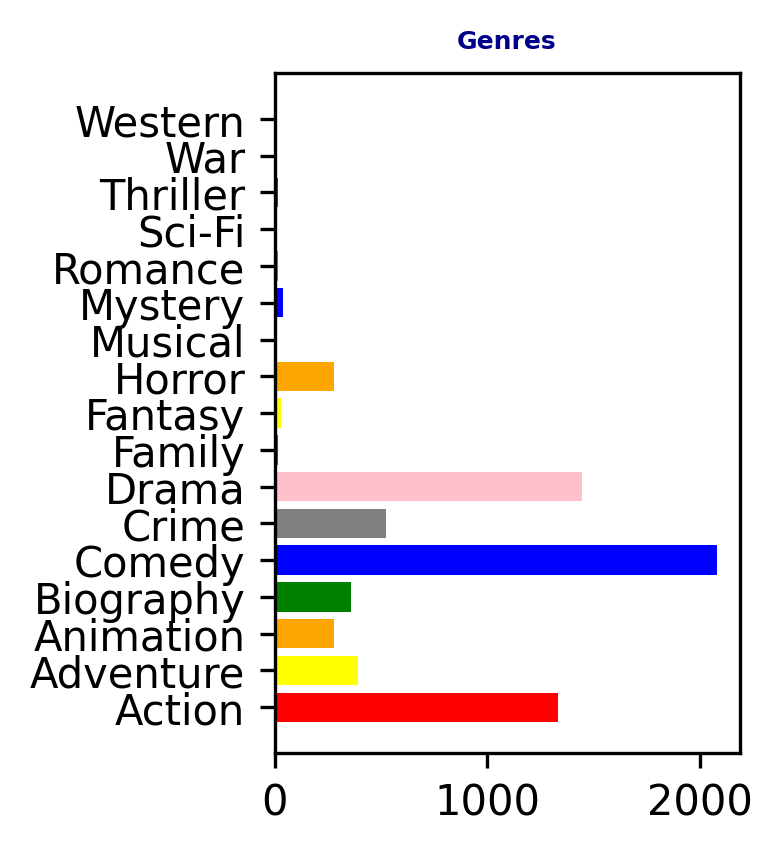

In [77]:
plt.figure(figsize=(2,3), dpi=300)
plt.barh(movies.groupby("genre")["genre"].count().index, 
        movies.groupby("genre")["genre"].count(), 
        color=["red","yellow","orange","green","blue","grey","pink"])
plt.title("Genres", fontdict=title_font)

plt.show()

Now let us see each category and the profit percentage they bring

In [78]:
genre_df = movies.groupby (['genre'])['profit_perc'].mean ().reset_index()
genre_df.sort_values(by=['profit_perc'], axis=0, ascending=False).head ()

,genre,profit_perc
9,Horror,36.67
1,Adventure,0.90
4,Comedy,0.72
13,Sci-Fi,0.61
8,Fantasy,0.46


In [79]:
genre_df = movies.groupby (['genre'])['profit_perc'].mean ().reset_index()
genre_df.sort_values(by=['profit_perc'], axis=0, ascending=False).head ()

,genre,profit_perc
9,Horror,36.67
1,Adventure,0.90
4,Comedy,0.72
13,Sci-Fi,0.61
8,Fantasy,0.46


In [80]:
company_df = movies.groupby (['company'])['profit_perc'].mean ().reset_index()
company_df.sort_values(by=['profit_perc'], axis=0, ascending=False).head ()

,company,profit_perc
1945,Solana Films,7193.59
1152,Haxan Films,2341.32
453,Brothers McMullen Productions,408.86
1727,Plunge Pictures LLC,254.09
500,Can I Watch,159.55


In [81]:
director_df = movies.groupby (['director'])['profit_perc'].mean ().reset_index()
director_df.sort_values(by=['profit_perc'], axis=0, ascending=False).head ()

,director,profit_perc
1955,Oren Peli,7193.59
516,Daniel Myrick,2341.32
712,Edward Burns,205.28
401,Chris Kentis,129.68
2276,Rose Troche,79.28


In [82]:
rating_df = movies.groupby (['rating'])['profit_perc'].mean ().reset_index()
rating_df.sort_values(by=['profit_perc'], axis=0, ascending=False).head ()

,rating,profit_perc
8,R,3.43
6,PG,0.67
7,PG-13,0.42
2,G,0.34
12,UNRATED,-0.05


In [83]:
score_df = movies.groupby (['score'])['profit_perc'].mean ().reset_index()
score_df.sort_values(by=['profit_perc'], axis=0, ascending=False).head ()

,score,profit_perc
46,6.30,25.33
47,6.40,8.27
72,8.90,6.29
0,1.50,4.57
25,4.20,2.80


In [84]:
star_df = movies.groupby (['star'])['profit_perc'].mean ().reset_index()
star_df.sort_values(by=['profit_perc'], axis=0, ascending=False).head ()

,star,profit_perc
1316,Katie Featherston,3610.42
864,Heather Donahue,2341.32
934,Jack Mulcahy,408.86
332,Carlos Gallardo,290.56
248,Blanchard Ryan,254.09


In [85]:
writer_df = movies.groupby (['writer'])['profit_perc'].mean ().reset_index()
writer_df.sort_values(by=['profit_perc'], axis=0, ascending=False).head ()

,writer,profit_perc
2996,Oren Peli,3605.35
788,Daniel Myrick,1171.04
608,Chris Kentis,254.09
1106,Edward Burns,205.28
3480,Rose Troche,159.55


Some of the findings show that, with percentage, there might be outlier values that needs to be cleaned. The high amount of percentage on some of these can be due to a very cheaply made movie to have earned way above its budget either due to cult following or unexpected success: 

We need to:

1- Check if the star, director, company that got the extraordinary percentage have other movies that earned a lot of profit (or if any other movie is present for these)

2- To see if it earned the profit through making a movie adored by audience with a very low budget we need to compare score for these 


In [86]:
oren_peli = movies[movies['director'].str.contains("Oren Peli")]
oren_peli

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,profit_perc
4683,15000.00,Solana Films,USA,Oren Peli,Horror,107918810.00,Paranormal Activity,R,2009-10-16,86,6.30,Katie Featherston,195668,Oren Peli,2007,107903810.00,7193.59


In [87]:
solana_films = movies[movies['company'].str.contains("Solana Films")]
solana_films

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,profit_perc
4683,15000.00,Solana Films,USA,Oren Peli,Horror,107918810.00,Paranormal Activity,R,2009-10-16,86,6.30,Katie Featherston,195668,Oren Peli,2007,107903810.00,7193.59


In [88]:
Daniel_Myrick = movies[movies['director'].str.contains("Daniel Myrick")]
Daniel_Myrick

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,profit_perc
2885,60000.00,Haxan Films,USA,Daniel Myrick,Horror,140539099.00,The Blair Witch Project,R,1999-07-30,81,6.40,Heather Donahue,202691,Daniel Myrick,1999,140479099.00,2341.32


As can be seen from above the movei "Paranormal Activity". Considering that both the movies were huge successes despite just using hand held cameras and limited setting. However we need to remove these rows as they ascew the info

In [0]:
movies2 = movies.drop ([4683,2885])                                                                                       


In [90]:
director_df = movies2.groupby (['director'])['profit_perc'].mean ().reset_index()
director_df.sort_values(by=['profit_perc'], axis=0, ascending=False).head ()

,director,profit_perc
711,Edward Burns,205.28
401,Chris Kentis,129.68
2274,Rose Troche,79.28
74,Alex Kendrick,51.14
1325,John Pogue,41.48


Let us see how the profit change by each decade for each genre

In [92]:
movies3 = 10 * (movies2['year'] // 10)
movies3

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
6815    2010
6816    2010
6817    2010
6818    2010
6819    2010
Name: year, Length: 6818, dtype: int64

In [93]:
pd.pivot_table(movies2, index = ['genre', movies3], values="profit_perc")


profit_perc
genre     year             
Action    1980         0.43
          1990         0.86
          2000        -0.05
          2010         0.07
Adventure 1980         0.45
...                     ...
Thriller  2000        -1.00
          2010        -1.00
War       1980        -0.98
Western   1990         0.83
          2010        -0.89

[61 rows x 1 columns]

In [94]:
import plotly.express as px

fig = px.bar(movies2, x=movies3, y="profit_perc", color="genre", barmode="group")
fig.show()

In [105]:
fig = px.histogram(movies2, x= movies3, y="profit_perc", histfunc="avg", color="genre", barmode="group",
             facet_row=movies3, facet_col="genre", category_orders={"decade": ["1980", "1990", "2000", "2010"]})
fig.show()

(-2.0, 7.0)

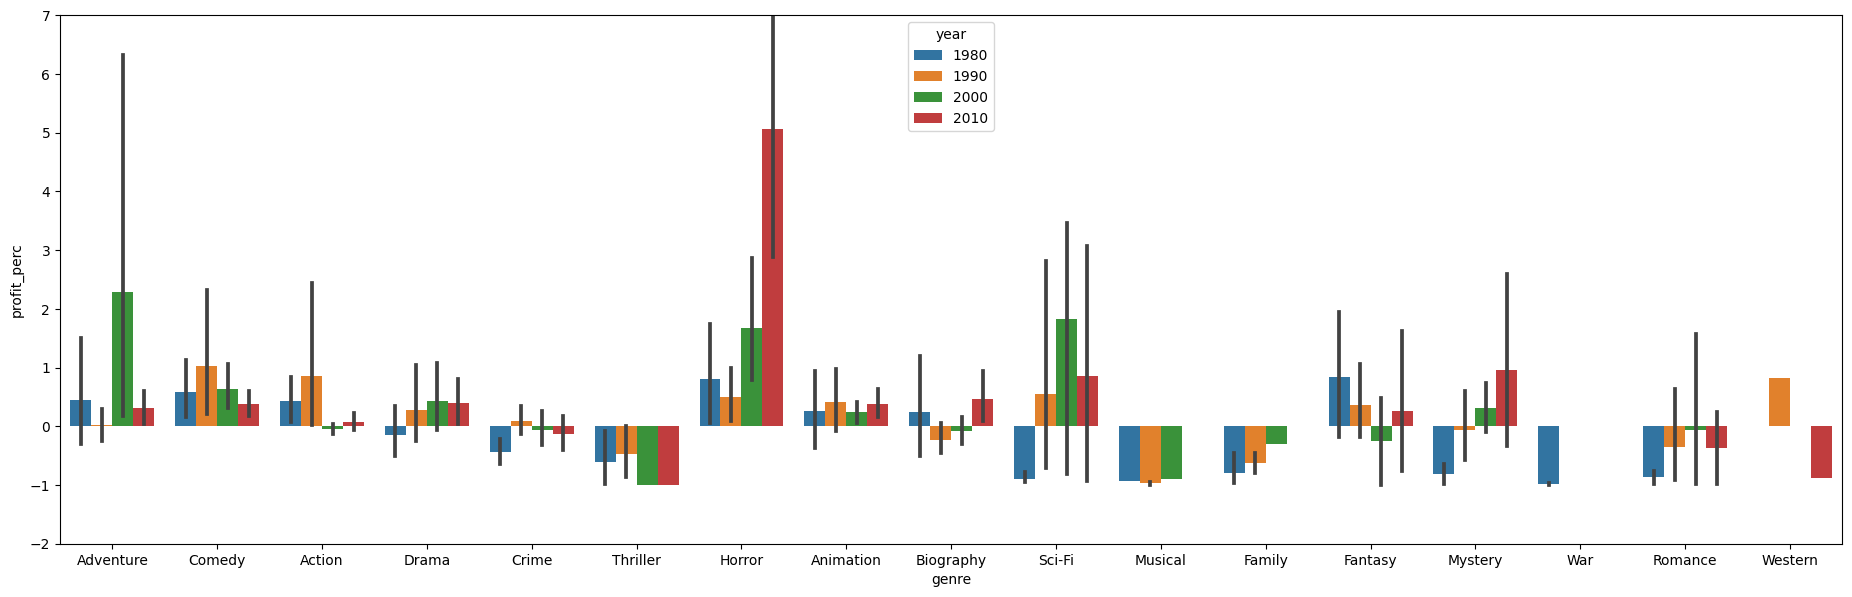

In [96]:
import seaborn as sns

plt.figure(figsize=(23,7))
sns.barplot(x='genre', y="profit_perc", hue=movies3, data=movies2)
plt.ylim((-2,7))

(-2.0, 7.0)

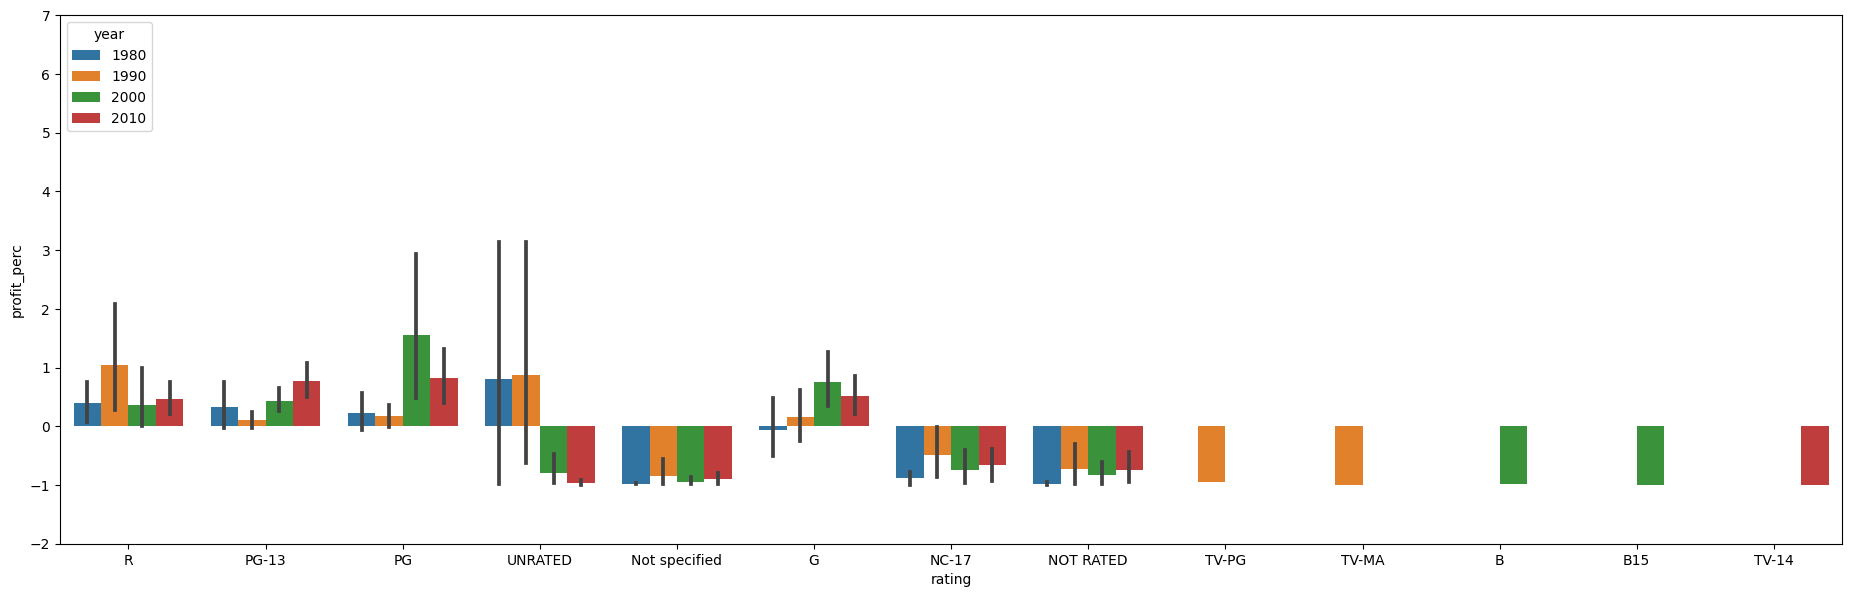

In [97]:
plt.figure(figsize=(23,7))
sns.barplot(x='rating', y="profit_perc", hue=movies3, data=movies2)
plt.ylim((-2,7))

(-2.0, 10.0)

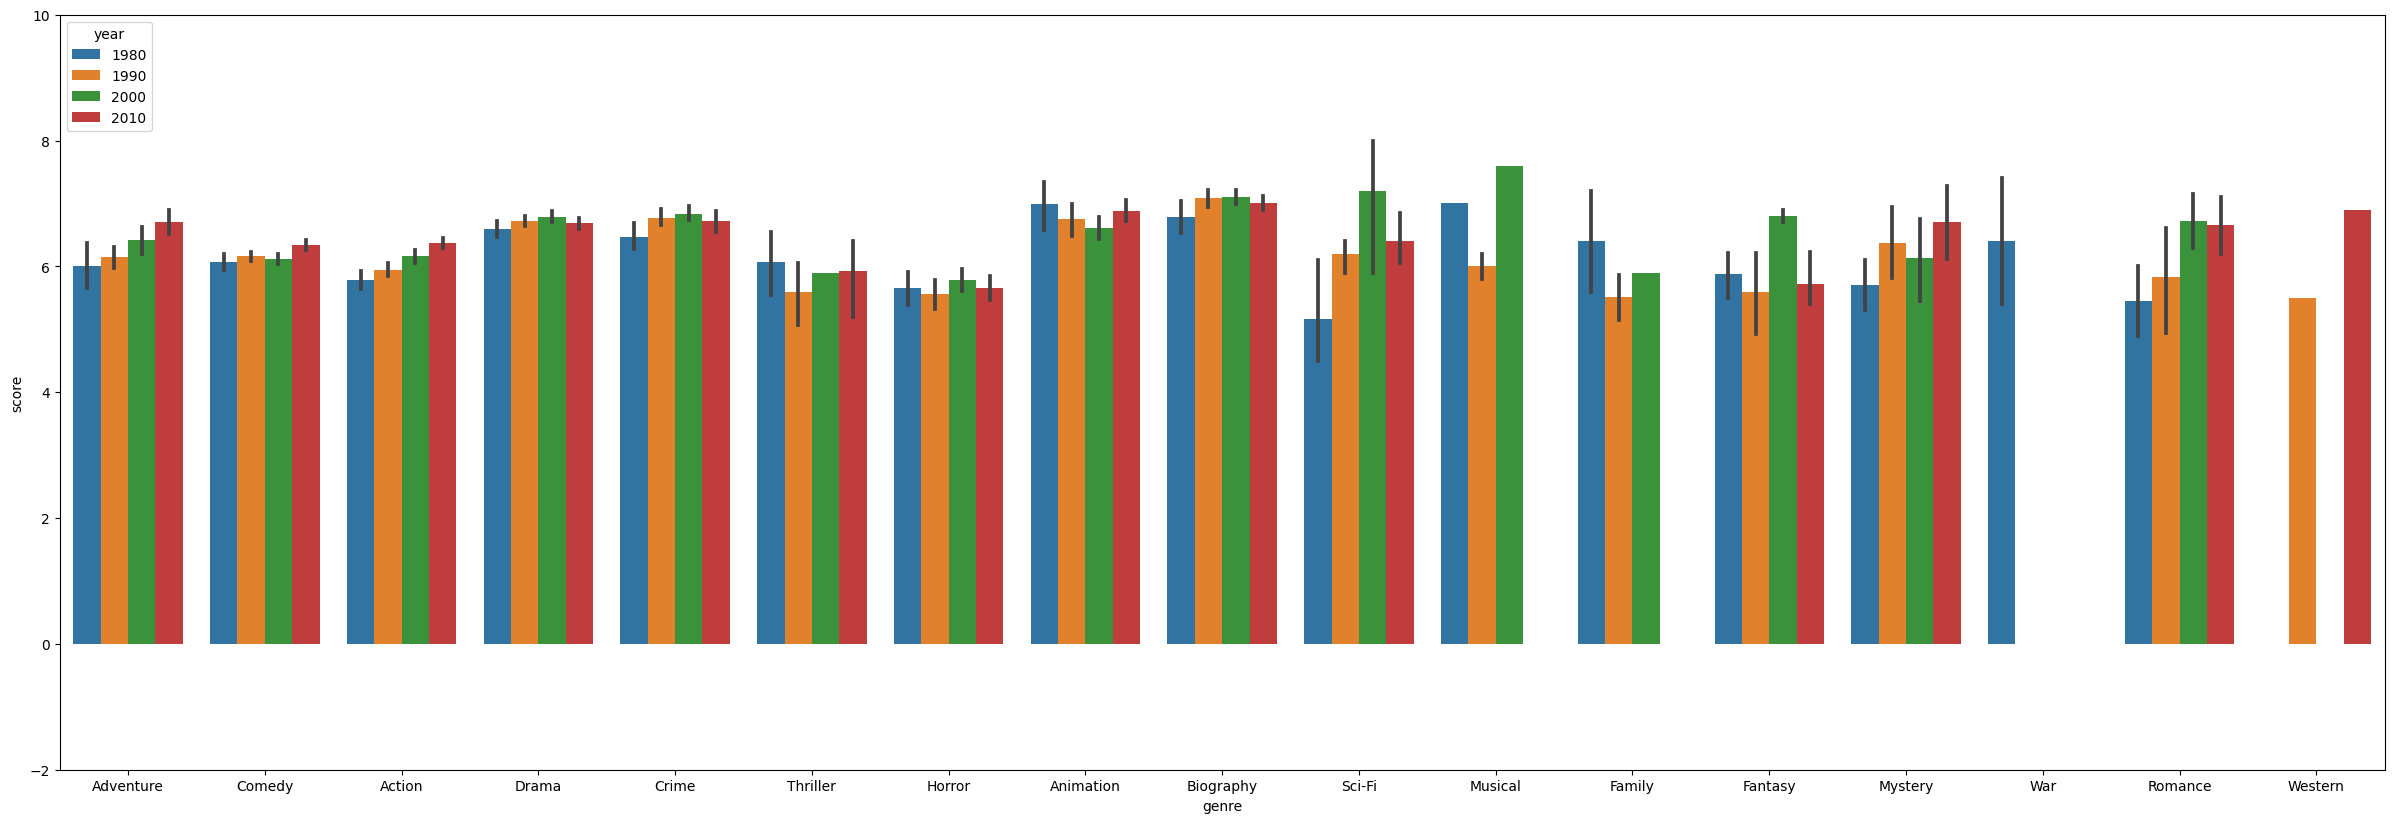

In [112]:
plt.figure(figsize=(30,10))
sns.barplot(x='genre', y="score", hue=movies3, data=movies2)
plt.ylim((-2,10))

(-2.0, 10.0)

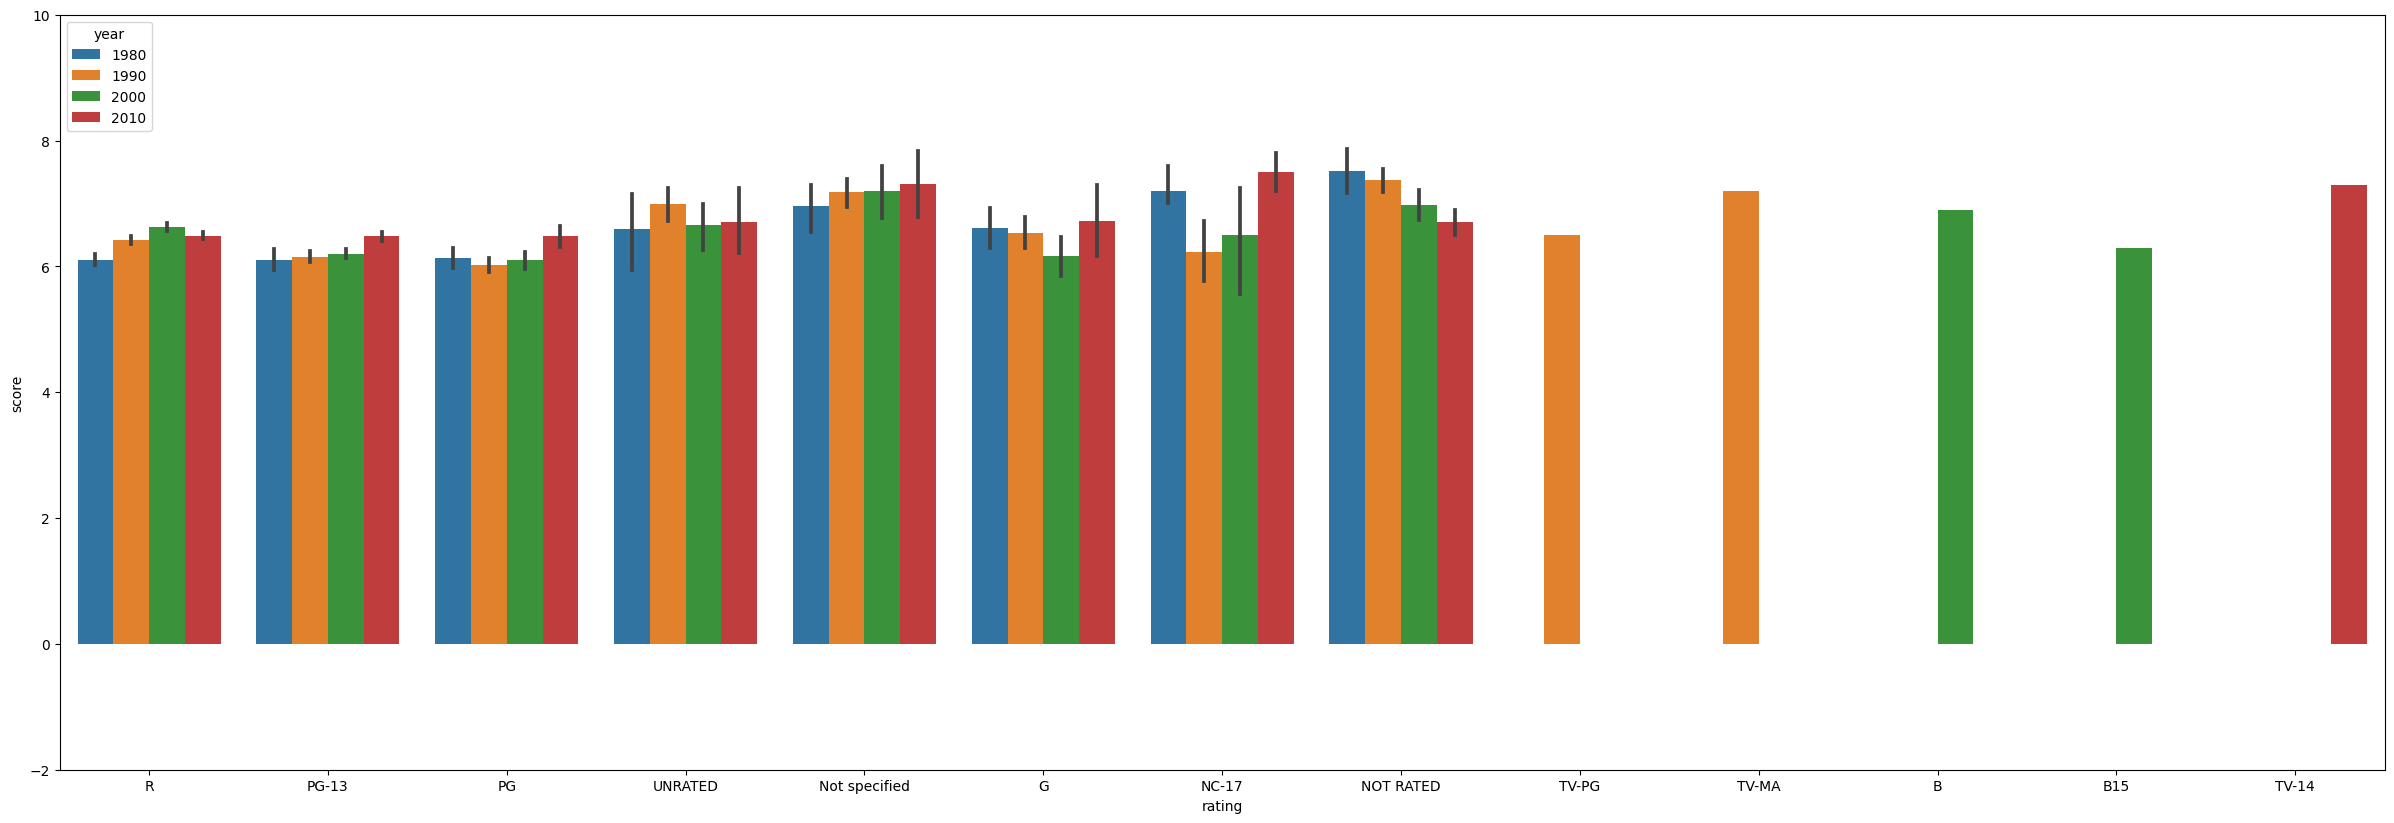

In [113]:
plt.figure(figsize=(30,10))
sns.barplot(x='rating', y="score", hue=movies3, data=movies2)
plt.ylim((-2,10))

As the data in question was mostly consisted of categorical data there is no real need for correllation checks. The only one that can give an interesting outcome is the score vs profit_perc



In [104]:
score_profit = movies2.loc[:,['score','profit_perc']]
score_profit.head()

,score,profit_perc
0,8.10,5.54
1,7.80,10.69
2,6.90,10.99
3,8.40,3.60
4,6.90,1.06


In [103]:
score_profit.corr()

,score,profit_perc
score,1.00,0.03
profit_perc,0.03,1.00


The correlation score is 0.03 between the score and profit. 

**CONCLUSION**

The IMDB database is a very useful tool for us to be able to see the changes in both the popularity (score) and the profitability (profit_perc) of the movies in relation to its categories. The data was very well prepared which did not bring the need to have excessive cleaning. The two main categories used in this examination are the genre and the rating. The genre results showed more interesting results. Especially some of the genre's both made sense and suprised. For example for the action genre the peak was 90s and fell steeply afterwards. This was something all the people that were children or young experienced, we watched a new action movie on the TV everyday and then they just became unpopular and disapeared. Another outcome that made sense was the peak of sci-fi after 90s, peak in 2000s and dropped somehow in 2010s. This directly corresponds to the rise of super hero movies and their decline in 2010s due to the high saturation of movies of that genre. On the other hand the high and steady profit of commedy movies was a big suprise for me personally but it explains why they are the most produced genre. <p>
Furthure analysis can be done by grouping the data per company, director or star of a movie to obtain insights. A future use for this data would be to use it as a prediction tool for production companies to predict the most profitable genre (or other categories and values like rating and movie length). 
